In [1]:
# id - a unique identifier for each trip
# vendor_id - a code indicating the provider associated with the trip record
# pickup_datetime - date and time when the meter was engaged
# dropoff_datetime - date and time when the meter was disengaged
# passenger_count - the number of passengers in the vehicle (driver entered value)
# pickup_longitude - the longitude where the meter was engaged
# pickup_latitude - the latitude where the meter was engaged
# dropoff_longitude - the longitude where the meter was disengaged
# dropoff_latitude - the latitude where the meter was disengaged
# store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
# trip_duration - (target) duration of the trip in seconds

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Data

In [2]:
data = pd.read_csv('~/Downloads/nyc_taxi_trip_duration 3.csv')

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [7]:
data.dtypes

id                      object
vendor_id                int64
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
dtype: object

In [8]:
data['pickup_datetime'] =  pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] =  pd.to_datetime(data['dropoff_datetime'])

In [9]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

# Data Cleaning

In [10]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [11]:
date  = pd.DatetimeIndex(data['pickup_datetime'])

In [12]:
data['doy_pickup'] = date.dayofyear
data['week_pickup'] = date.weekofyear
data['moy_pickup'] = date.month
data['dow_pickup'] = date.dayofweek
data['day_of_pickup'] = date.day_name()

/var/folders/s7/903k1s2139v_myj9l94b19wh0000gn/T/ipykernel_34707/3930540550.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['week_pickup'] = date.weekofyear


In [13]:
data[['pickup_datetime','doy_pickup','week_pickup','moy_pickup','dow_pickup','day_of_pickup']].head()

,pickup_datetime,doy_pickup,week_pickup,moy_pickup,dow_pickup,day_of_pickup
0,2016-02-29 16:40:21,60,9,2,0,Monday
1,2016-03-11 23:35:37,71,10,3,4,Friday
2,2016-02-21 17:59:33,52,7,2,6,Sunday
3,2016-01-05 09:44:31,5,1,1,1,Tuesday
4,2016-02-17 06:42:23,48,7,2,2,Wednesday


# Exploratory Data Analysis (EDA)

In [14]:
data['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

Text(0, 0.5, 'passenger frequency')

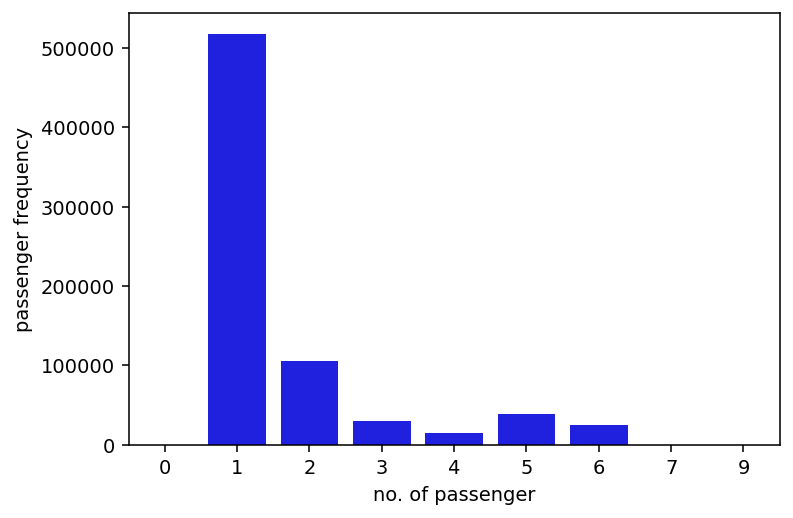

In [15]:
plt.figure(figsize=(6,4),dpi=140)
sns.barplot(x=data['passenger_count'].value_counts().index,y=data['passenger_count'].value_counts().values,color='blue');
plt.xlabel('no. of passenger')
plt.ylabel('passenger frequency')


This graph shows that mostly 1 or 2 person is using the cab service.  

In [16]:
date1  = pd.DatetimeIndex(data['dropoff_datetime'])
data['doy_dropoff'] = date1.dayofyear
data['week_dropoff'] = date1.weekofyear
data['moy_dropoff'] = date1.month
data['dow_dropoff'] = date1.dayofweek
data['day_of_dropoff'] = date1.day_name()

/var/folders/s7/903k1s2139v_myj9l94b19wh0000gn/T/ipykernel_34707/2119478355.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['week_dropoff'] = date1.weekofyear


In [17]:
data[['dropoff_datetime','doy_dropoff','week_dropoff','moy_dropoff','dow_dropoff','day_of_dropoff']].head()

,dropoff_datetime,doy_dropoff,week_dropoff,moy_dropoff,dow_dropoff,day_of_dropoff
0,2016-02-29 16:47:01,60,9,2,0,Monday
1,2016-03-11 23:53:57,71,10,3,4,Friday
2,2016-02-21 18:26:48,52,7,2,6,Sunday
3,2016-01-05 10:03:32,5,1,1,1,Tuesday
4,2016-02-17 06:56:31,48,7,2,2,Wednesday


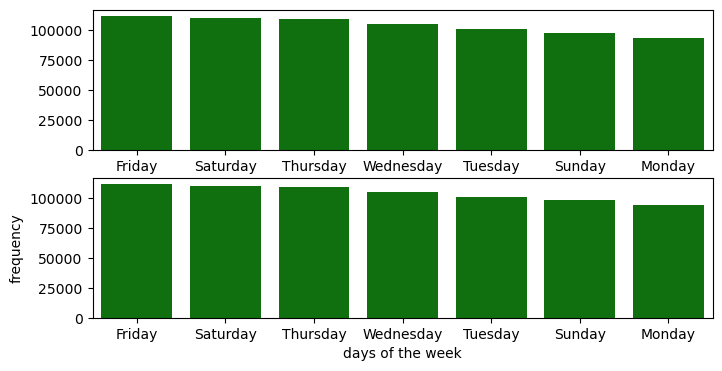

In [18]:
fig,ax = plt.subplots(nrows=2, ncols=1,figsize=(8,4))
sns.barplot(ax=ax[0],x=data['day_of_pickup'].value_counts().index,y=data['dow_pickup'].value_counts().values,color='green');
sns.barplot(ax=ax[1],x=data['day_of_dropoff'].value_counts().index,y=data['dow_dropoff'].value_counts().values,color='green');
plt.xlabel('days of the week')
plt.ylabel('frequency')
plt.show()

The number of people travelling on Friday is more than number of people travelling on Monday.

In [19]:
#     4-8am : early morning - datetime.time(4, 0, 1)  - datetime(8, 0, 0)
#     8-12pm: morning -  
#     12-4pm:afternoon
#     4-8pm:evening
#     8-12am:night
#     12-4am: late night

In [20]:
data['pickup_datetime'].dt.time

0         16:40:21
1         23:35:37
2         17:59:33
3         09:44:31
4         06:42:23
            ...   
729317    13:29:38
729318    00:43:11
729319    18:56:48
729320    09:50:47
729321    17:24:16
Name: pickup_datetime, Length: 729322, dtype: object

In [21]:
import datetime 
def time_extract(x):
    if x >= datetime.time(4, 0, 0) and x < datetime.time(8, 0, 0):
        return ('early_morning')
    elif x >= datetime.time(8, 0, 0) and x < datetime.time(12, 0, 0):
        return ('morning')
    elif x >= datetime.time(12, 0, 0) and x < datetime.time(16, 0, 0):
        return ('afternoon')
    elif x >= datetime.time(16, 0, 0) and x < datetime.time(20, 0, 0):
        return ('evening')
    elif x >= datetime.time(20, 0, 0) and x <= datetime.time(23, 59, 59):
        return ('night')
    else:
        return ('late_night')

In [22]:
data['pickup_time'] = data['pickup_datetime'].dt.time.apply(lambda x: time_extract(x))

In [23]:
data['dropoff_time'] = data['dropoff_datetime'].dt.time.apply(lambda x: time_extract(x))

In [24]:
data['pickup_time']

0               evening
1                 night
2               evening
3               morning
4         early_morning
              ...      
729317        afternoon
729318       late_night
729319          evening
729320          morning
729321          evening
Name: pickup_time, Length: 729322, dtype: object

In [25]:
data['dropoff_time']

0               evening
1                 night
2               evening
3               morning
4         early_morning
              ...      
729317        afternoon
729318       late_night
729319          evening
729320          morning
729321          evening
Name: dropoff_time, Length: 729322, dtype: object

Text(0.5, 1.0, 'dropoff time')

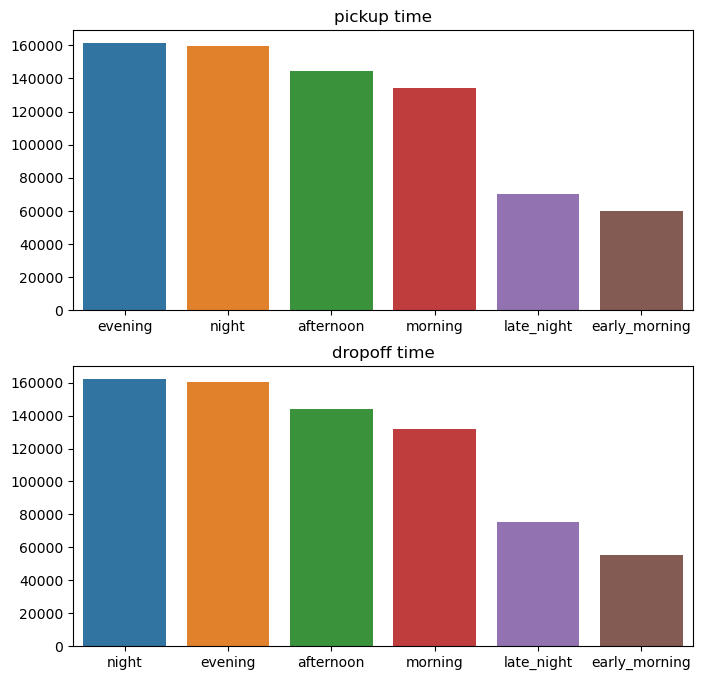

In [26]:
fig,ax = plt.subplots(nrows=2, ncols=1,figsize=(8,8))
sns.barplot(ax=ax[0],x=data['pickup_time'].value_counts().index , y=data['pickup_time'].value_counts().values )
sns.barplot(ax=ax[1],x=data['dropoff_time'].value_counts().index , y=data['dropoff_time'].value_counts().values )
ax[0].set_title('pickup time')
ax[1].set_title('dropoff time')

Maximum number of pickups in Evening time and Maximum number of dropoffs in Night time. 
Less traffic in Early morning.

(array([45969., 24384., 15348., 44459., 67433., 66774., 71450., 72807.,
        70460., 90666., 84210., 75362.]),
 array([ 0.        ,  1.91666667,  3.83333333,  5.75      ,  7.66666667,
         9.58333333, 11.5       , 13.41666667, 15.33333333, 17.25      ,
        19.16666667, 21.08333333, 23.        ]),
 <BarContainer object of 12 artists>)

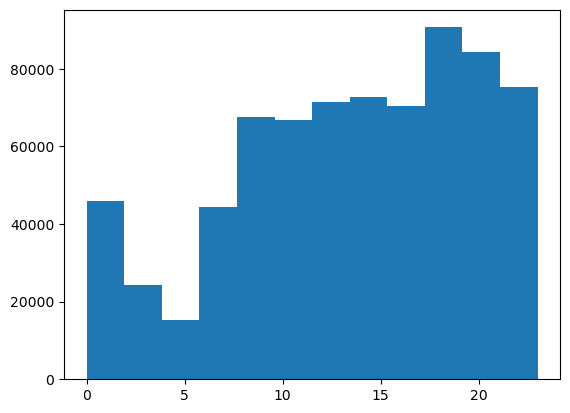

In [27]:
plt.hist(data['pickup_datetime'].dt.hour,bins=12)

(array([49798., 25900., 15476., 39608., 65912., 66269., 71178., 72570.,
        68935., 91715., 84637., 77324.]),
 array([ 0.        ,  1.91666667,  3.83333333,  5.75      ,  7.66666667,
         9.58333333, 11.5       , 13.41666667, 15.33333333, 17.25      ,
        19.16666667, 21.08333333, 23.        ]),
 <BarContainer object of 12 artists>)

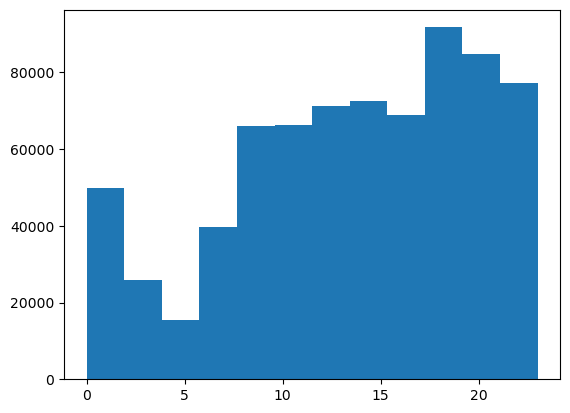

In [28]:
plt.hist(data['dropoff_datetime'].dt.hour,bins=12)

The histogram above shows that the maximum number of people are travelling during the evening/night time which was also inferred from the above barplots 

In [29]:
data['trip_duration']

0          400
1         1100
2         1635
3         1141
4          848
          ... 
729317     296
729318     315
729319     673
729320     447
729321    1224
Name: trip_duration, Length: 729322, dtype: int64

/var/folders/s7/903k1s2139v_myj9l94b19wh0000gn/T/ipykernel_34707/2417088972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['trip_duration'],kde=False)


<AxesSubplot: xlabel='trip_duration'>

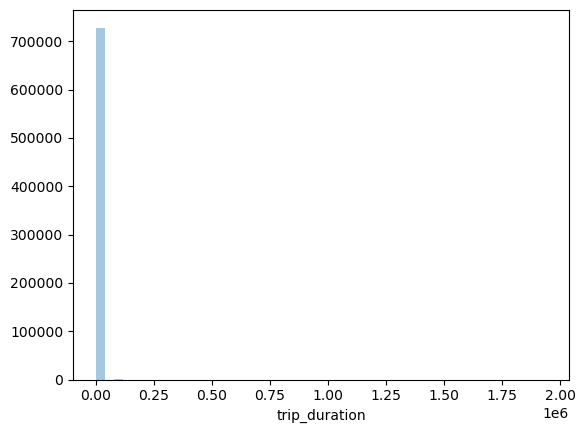

In [30]:
sns.distplot(data['trip_duration'],kde=False)

In [31]:
data['trip_duration'].nlargest(n=10)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64

In [32]:
data = data[data['trip_duration']!=data['trip_duration'].max()]

In [33]:
data['trip_duration'].max()

86391

/var/folders/s7/903k1s2139v_myj9l94b19wh0000gn/T/ipykernel_34707/94777440.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['trip_duration'])


<AxesSubplot: xlabel='trip_duration', ylabel='Density'>

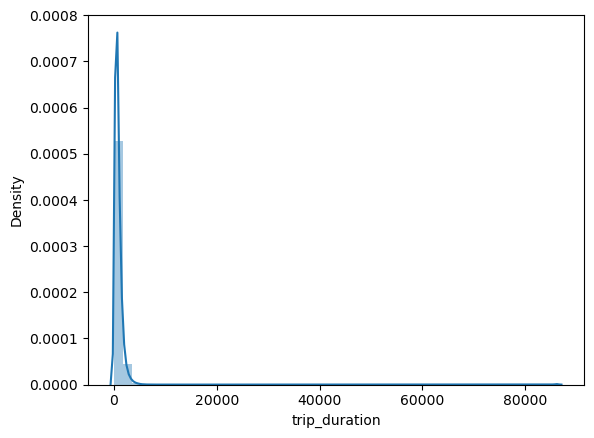

In [34]:
sns.distplot(data['trip_duration'])

Text(0, 0.5, 'frequency')

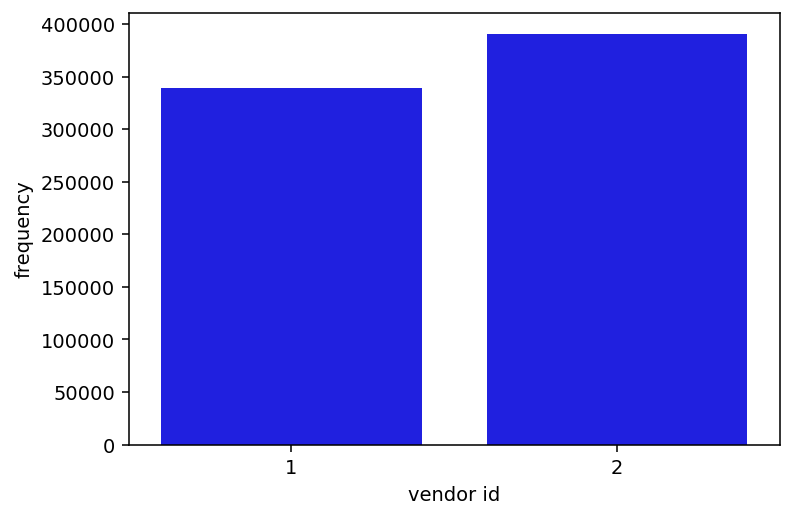

In [35]:
plt.figure(figsize=(6,4),dpi=140)
sns.barplot(x=data['vendor_id'].value_counts().index,y=data['vendor_id'].value_counts().values,color='blue');
plt.xlabel('vendor id')
plt.ylabel('frequency')


Vendor id: 2 has more customers as compared to Vendor id: 1

In [36]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'doy_pickup', 'week_pickup', 'moy_pickup',
       'dow_pickup', 'day_of_pickup', 'doy_dropoff', 'week_dropoff',
       'moy_dropoff', 'dow_dropoff', 'day_of_dropoff', 'pickup_time',
       'dropoff_time'],
      dtype='object')

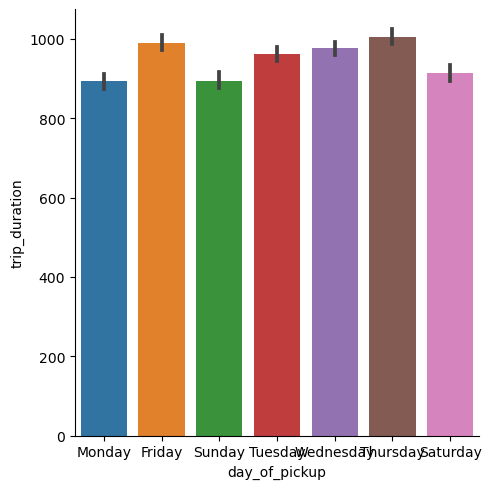

In [37]:
sns.catplot(x="day_of_pickup", y="trip_duration", kind='bar', data= data);

The duration of the trips is maximum for Thursdays and Fridays and minimum for Mondays, Sundays and Saturdays.

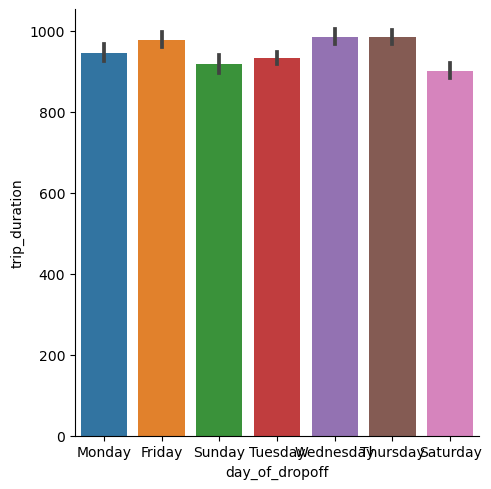

In [38]:
sns.catplot(x="day_of_dropoff", y="trip_duration", kind='bar', data= data);

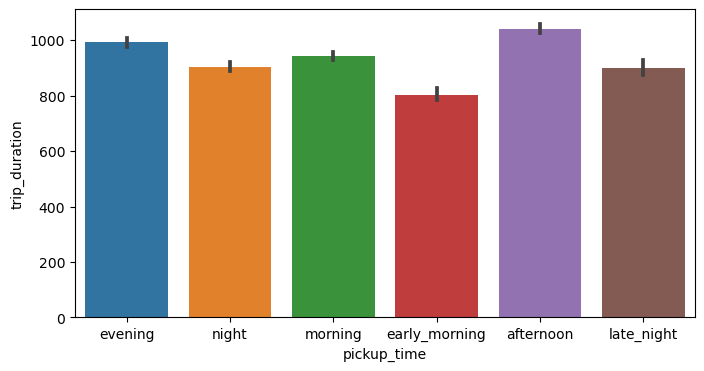

In [39]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
sns.barplot(x="pickup_time", y="trip_duration", data= data);

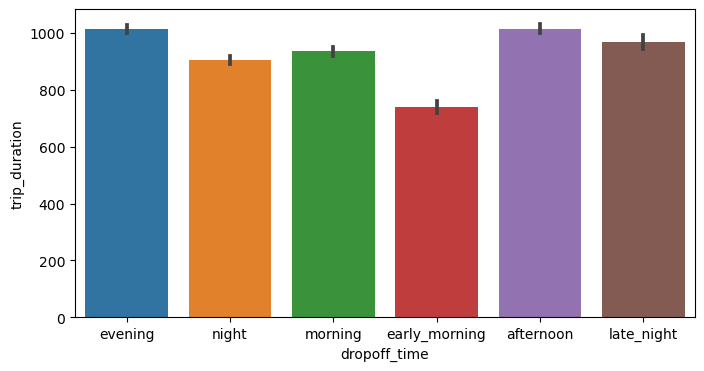

In [40]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
sns.barplot(x="dropoff_time", y="trip_duration", data= data);

Maximum trip duration is between afternoon(12pm to 4pm) and evening(4pm to 8pm) likely because of the traffic.

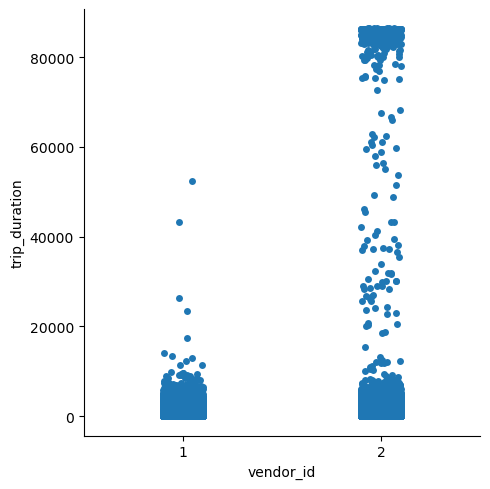

In [41]:
sns.catplot(x="vendor_id", y="trip_duration", kind='strip', data= data);

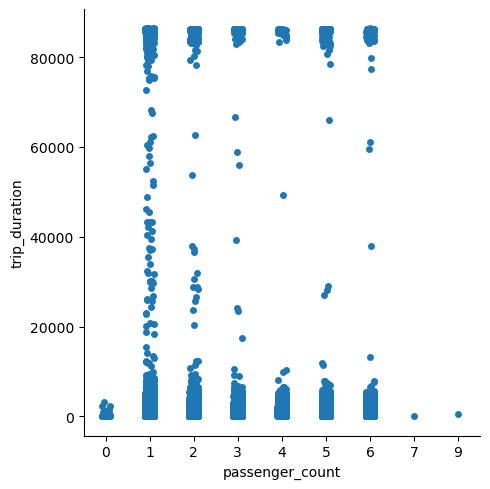

In [42]:
sns.catplot(x="passenger_count", y="trip_duration", kind='strip', data= data);

No such relationship is displayed in passenger count and trip duration. Passenger count 7 to 9 has no large trip durations.

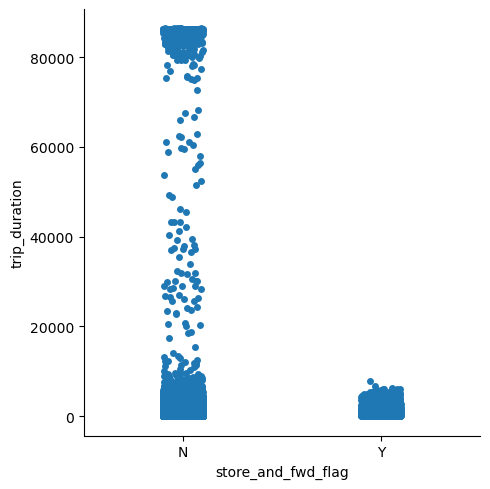

In [43]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration", kind='strip', data= data);

The flag is stored for short trip durations only.

Conclusion:
1. Most trips are taken on Friday , Saturday and Thursday
2. Maximum number of pickups in Evening time and Maximum number of dropoffs in Night time. Less traffic in Early morning.
3. Vendor 2 mostly provides the longer trips
4. The duration of the trips is maximum for Thursdays and Fridays and minimum for Mondays, Sundays and Saturdays.
5. Maximum trip duration is between afternoon(12pm to 4pm) and evening(4pm to 8pm) likely because of the traffic.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [6]:
data=pd.concat([data,pd.get_dummies(data['store_and_fwd_flag'],prefix='flag',prefix_sep='_')],axis=1)

In [7]:
data['pickup_datetime'] =  pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] =  pd.to_datetime(data['dropoff_datetime'])

In [8]:
data['pickup_time']=data['pickup_datetime'].dt.time
data['dropoff_time'] = data['dropoff_datetime'].dt.time

Splitting the time into bins

In [9]:
import datetime 
def time_extract(x):
    if x >= datetime.time(4, 0, 0) and x < datetime.time(8, 0, 0):
        return ('early_morning')
    elif x >= datetime.time(8, 0, 0) and x < datetime.time(12, 0, 0):
        return ('morning')
    elif x >= datetime.time(12, 0, 0) and x < datetime.time(16, 0, 0):
        return ('afternoon')
    elif x >= datetime.time(16, 0, 0) and x < datetime.time(20, 0, 0):
        return ('evening')
    elif x >= datetime.time(20, 0, 0) and x <= datetime.time(23, 59, 59):
        return ('night')
    else:
        return ('late_night')

In [10]:
data['pickup_time'] = data['pickup_datetime'].dt.time.apply(lambda x: time_extract(x))
data['dropoff_time'] = data['dropoff_datetime'].dt.time.apply(lambda x: time_extract(x))

In [11]:
date1  = pd.DatetimeIndex(data['dropoff_datetime'])
date2  = pd.DatetimeIndex(data['pickup_datetime'])
data['day_of_pickup'] = date2.day_name()
data['day_of_dropoff'] = date1.day_name()

In [12]:
data=pd.concat([data,pd.get_dummies(data['pickup_time'],prefix='pickuptime',prefix_sep='_')],axis=1)
data=pd.concat([data,pd.get_dummies(data['dropoff_time'],prefix='droptime',prefix_sep='_')],axis=1)
data=pd.concat([data,pd.get_dummies(data['day_of_pickup'],prefix='pickupday',prefix_sep='_')],axis=1)
data=pd.concat([data,pd.get_dummies(data['day_of_dropoff'],prefix='dropoffday',prefix_sep='_')],axis=1)

In [13]:
data = data.drop(['id','pickup_datetime','dropoff_datetime'],axis=1)

In [14]:
data=pd.concat([data,pd.get_dummies(data['vendor_id'],prefix='vendor',prefix_sep='_')],axis=1)

In [15]:
data = data.drop(['vendor_id','pickup_time','dropoff_time','store_and_fwd_flag','day_of_pickup','day_of_dropoff'],axis=1)

In [16]:
data

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,flag_N,flag_Y,pickuptime_afternoon,pickuptime_early_morning,...,pickupday_Wednesday,dropoffday_Friday,dropoffday_Monday,dropoffday_Saturday,dropoffday_Sunday,dropoffday_Thursday,dropoffday_Tuesday,dropoffday_Wednesday,vendor_1,vendor_2
0,1,-73.953918,40.778873,-73.963875,40.771164,400,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,1100,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,1635,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,-74.017120,40.708469,-73.988182,40.740631,848,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,-73.965919,40.789780,-73.952637,40.789181,296,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
729318,1,-73.996666,40.737434,-74.001320,40.731911,315,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
729319,1,-73.997849,40.761696,-74.001488,40.741207,673,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
729320,1,-74.006706,40.708244,-74.013550,40.713814,447,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
!pip install geopy

In [18]:
import geopy 
from geopy import distance

In [19]:
def cal_distance(data):
    pickup = (data['pickup_latitude'], data['pickup_longitude'])
    dropoff = (data['dropoff_latitude'], data['dropoff_longitude'])
    return distance.distance(pickup,dropoff).miles

In [20]:
data['distance'] = data.apply(lambda x : cal_distance(x),axis=1)

In [21]:
num_cols = ['distance','trip_duration']

In [22]:
for i in num_cols:
    data[i] = np.log(data[i] + 10)


In [23]:
data[num_cols]

,distance,trip_duration
0,2.374487,6.016157
1,2.530716,7.012115
2,2.674508,7.405496
3,2.439331,7.048386
4,2.540766,6.754604
...,...,...
729317,2.370042,5.723585
729318,2.346861,5.783825
729319,2.435946,6.526495
729320,2.353861,6.124683


In [24]:
data

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,flag_N,flag_Y,pickuptime_afternoon,pickuptime_early_morning,...,dropoffday_Friday,dropoffday_Monday,dropoffday_Saturday,dropoffday_Sunday,dropoffday_Thursday,dropoffday_Tuesday,dropoffday_Wednesday,vendor_1,vendor_2,distance
0,1,-73.953918,40.778873,-73.963875,40.771164,6.016157,1,0,0,0,...,0,1,0,0,0,0,0,0,1,2.374487
1,2,-73.988312,40.731743,-73.994751,40.694931,7.012115,1,0,0,0,...,1,0,0,0,0,0,0,1,0,2.530716
2,2,-73.997314,40.721458,-73.948029,40.774918,7.405496,1,0,0,0,...,0,0,0,1,0,0,0,0,1,2.674508
3,6,-73.961670,40.759720,-73.956779,40.780628,7.048386,1,0,0,0,...,0,0,0,0,0,1,0,0,1,2.439331
4,1,-74.017120,40.708469,-73.988182,40.740631,6.754604,1,0,0,1,...,0,0,0,0,0,0,1,1,0,2.540766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,-73.965919,40.789780,-73.952637,40.789181,5.723585,1,0,1,0,...,0,0,1,0,0,0,0,0,1,2.370042
729318,1,-73.996666,40.737434,-74.001320,40.731911,5.783825,1,0,0,0,...,0,1,0,0,0,0,0,1,0,2.346861
729319,1,-73.997849,40.761696,-74.001488,40.741207,6.526495,1,0,0,0,...,1,0,0,0,0,0,0,1,0,2.435946
729320,1,-74.006706,40.708244,-74.013550,40.713814,6.124683,1,0,0,0,...,0,0,0,1,0,0,0,1,0,2.353861


Performing Standard Scaling

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [26]:
num_cols = ['distance']

In [27]:
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])


In [28]:
scaled

array([[-0.64065079],
       [ 0.30184002],
       [ 1.16930045],
       ...,
       [-0.26988826],
       [-0.7650865 ],
       [ 0.8244042 ]])

In [29]:
scaled = pd.DataFrame(scaled,columns=num_cols)

In [38]:
scaled

,distance
0,-0.640651
1,0.301840
2,1.169300
3,-0.249463
4,0.362469
...,...
729317,-0.667468
729318,-0.807313
729319,-0.269888
729320,-0.765086


In [43]:
num_cols = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance']

In [44]:
new_data = data.copy()
new_data=new_data.drop(num_cols,axis=1)
new_data = new_data.merge(scaled,left_index = True, right_index= True,how='left')

In [45]:
new_data

,passenger_count,trip_duration,flag_N,flag_Y,pickuptime_afternoon,pickuptime_early_morning,pickuptime_evening,pickuptime_late_night,pickuptime_morning,pickuptime_night,...,dropoffday_Friday,dropoffday_Monday,dropoffday_Saturday,dropoffday_Sunday,dropoffday_Thursday,dropoffday_Tuesday,dropoffday_Wednesday,vendor_1,vendor_2,distance
0,1,6.016157,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,-0.640651
1,2,7.012115,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0.301840
2,2,7.405496,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1.169300
3,6,7.048386,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,-0.249463
4,1,6.754604,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.362469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,5.723585,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,-0.667468
729318,1,5.783825,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,-0.807313
729319,1,6.526495,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,-0.269888
729320,1,6.124683,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,-0.765086


In [46]:
new_data = new_data[np.isfinite(new_data).all(1)]
y_all = new_data['trip_duration']

In [47]:
new_data = new_data.drop('trip_duration',axis=1)

In [48]:
new_data

,passenger_count,flag_N,flag_Y,pickuptime_afternoon,pickuptime_early_morning,pickuptime_evening,pickuptime_late_night,pickuptime_morning,pickuptime_night,droptime_afternoon,...,dropoffday_Friday,dropoffday_Monday,dropoffday_Saturday,dropoffday_Sunday,dropoffday_Thursday,dropoffday_Tuesday,dropoffday_Wednesday,vendor_1,vendor_2,distance
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,-0.640651
1,2,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0.301840
2,2,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1.169300
3,6,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,-0.249463
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.362469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,-0.667468
729318,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,-0.807313
729319,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,-0.269888
729320,1,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,-0.765086


In [49]:
y_all

0         6.016157
1         7.012115
2         7.405496
3         7.048386
4         6.754604
            ...   
729317    5.723585
729318    5.783825
729319    6.526495
729320    6.124683
729321    7.118016
Name: trip_duration, Length: 729322, dtype: float64

# Splitting the Data

In [50]:
x_train,x_test,y_train,y_test = train_test_split(new_data,y_all,test_size=1/3)

In [51]:
from sklearn.linear_model import LinearRegression

# Model Building (Linear Regression)

In [52]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
model.predict(x_test)

array([6.17797852, 6.37768555, 6.17504883, ..., 6.39135742, 6.25390625,
       7.54394531])

In [53]:
y_predict = model.predict(x_test)

# Model Evaluation

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
model_mse = mean_squared_error(y_test,y_predict)

In [56]:
model_mse

0.30446627316662667

In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predict)

0.39943814703698155

The model accuracy using Linear Regresion is 0.39943814703698155

# Model Building (Decision Tree)

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt_model = DecisionTreeRegressor(random_state=10)

In [37]:
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=10)

In [38]:
dt_model.score(x_train, y_train)

0.9897924342035279

# Model Evaluation

In [39]:
dt_model.score(x_test, y_test)

0.4003551258532764

The model accuracy using Decision Tree is 0.4003551258532764

# Performing Hyperparameter Tuning

In [40]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,20):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_test, y_test))

In [41]:
frame = pd.DataFrame({'max_depth':range(1,20), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.386803,0.384551
1,2,0.534900,0.531511
2,3,0.582858,0.579242
3,4,0.600856,0.597221
4,5,0.616986,0.613024


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


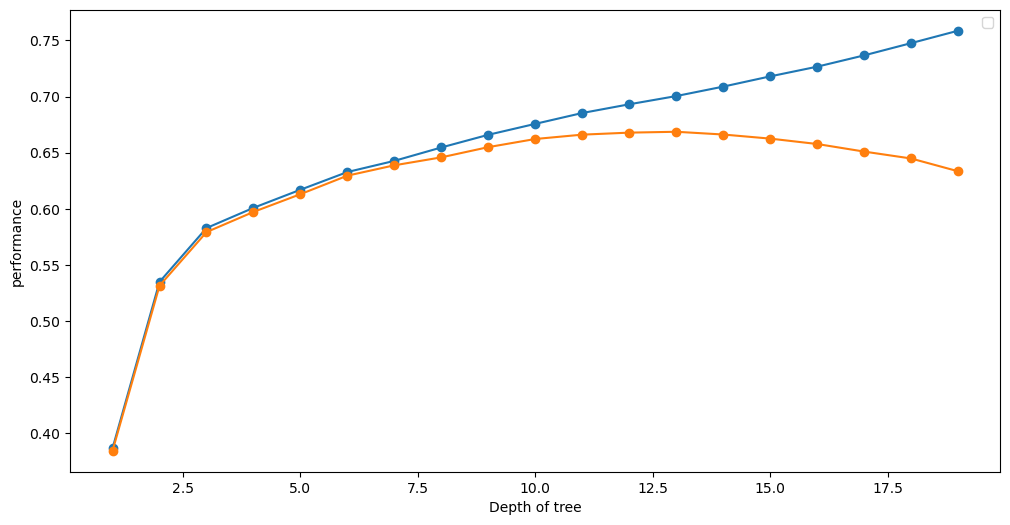

In [42]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [43]:
dt_model = DecisionTreeRegressor(max_depth=11, max_leaf_nodes=30, random_state=10)

In [44]:
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=11, max_leaf_nodes=30, random_state=10)

In [45]:
dt_model.score(x_train, y_train)

0.6273548292867002

# Model Evaluation

In [46]:
dt_model.score(x_test, y_test)

0.6242977649845678